# Análisis de comentarios

### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Importación de datos

In [2]:
commentsDf = pd.read_excel("DataSets/comments_final.xlsx", encoding='latin-1')

In [3]:
commentsDf.head()

,id,tipo,campus,id_programa,nps,programa,id_externo_programa,id_modulo,modulo,instructor,...,fecha_inicio_modulo,fecha_fin_modulo,indicador,codigo_indicador,comentario,puntaje_sentimiento,sentimiento,categoria,subcategoria,grupo
0,1,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"Que su curso lo haga mas dinámico, tiene una v...",-0.12,Negativo,Instructor,Dinamismo y Ejercicios,4
1,2,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"El instructuor es muy bueno, conoce muy bien l...",0.46,Positivo,Instructor,Habilidad de Enseñanza,4
2,3,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,Todo estuvo bien. Me gustarían ejercicios prác...,0.10,Neutral,Instructor,Dinamismo y Ejercicios,4
3,4,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,"La clase estuvo excelente, pero sería major si...",0.30,Positivo,Programa,Diseño y Estructura (Coherencia),4
4,5,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-05-11,2018-06-01,Retroalimentación para el Instructor,CAINST,Actividades más dinámicas durante el curso,0.22,Positivo,Instructor,Dinamismo y Ejercicios,4


In [4]:
commentsDf.columns

Index(['id', 'tipo', 'campus', 'id_programa', 'nps', 'programa',
       'id_externo_programa', 'id_modulo', 'modulo', 'instructor',
       'correo_instructor', 'fecha_instructor', 'nombre_coordinador',
       'correo_coordinador', 'fecha_coordinador', 'fecha_inicio_modulo',
       'fecha_fin_modulo', 'indicador', 'codigo_indicador', 'comentario',
       'puntaje_sentimiento', 'sentimiento', 'categoria', 'subcategoria',
       'grupo'],
      dtype='object')

## Estadística básica de los campos numéricos

In [5]:
commentsDf.describe()

,id,id_programa,nps,id_modulo,puntaje_sentimiento,grupo
count,103340.000000,103340.000000,96911.000000,103340.000000,103340.000000,103340.000000
mean,51670.500000,6824.553571,78.240378,106506.502448,0.176729,3.483162
std,29831.832746,1025.533763,26.176684,14106.696160,0.281774,1.199393
min,1.000000,3483.000000,-100.000000,60328.000000,-1.000000,0.000000
25%,25835.750000,6461.000000,71.000000,95739.000000,0.000000,4.000000
50%,51670.500000,6906.000000,85.000000,106167.000000,0.160000,4.000000
75%,77505.250000,7348.000000,96.000000,116287.000000,0.370000,4.000000
max,103340.000000,9464.000000,100.000000,142644.000000,1.000000,4.000000


## Número de registros por campus

In [6]:
commentsDf.groupby('campus').size().sort_values(ascending=False).to_frame()

,0
campus,
CSF (Santa Fe),25033
MTY (Monterrey),11120
CCM (Ciudad de México),10517
CEM (Estado de México),9812
GDL (Guadalajara),7843
QRO (Querétaro),6675
PUE (Puebla),6353
ECU(Ecuador),3273
SLP (San Luis Potosí),2303


## Distribución del NPS

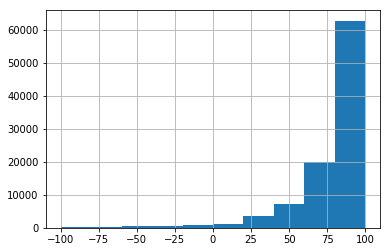

In [7]:
commentsDf['nps'].hist()

## Distribución del puntaje de sentimiento

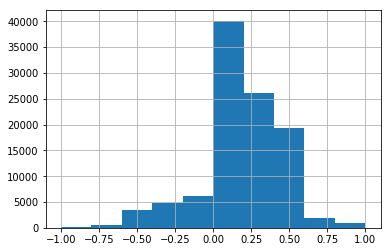

In [8]:
commentsDf['puntaje_sentimiento'].hist()

## Scatter plot de NPS vs. Puntaje de sentimiento

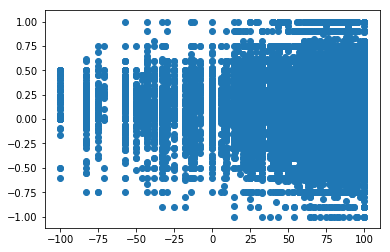

In [9]:
x1 = commentsDf['nps']
y1 = commentsDf['puntaje_sentimiento']
plt.scatter(x1,y1)
plt.show()

### Específicamente en campus Monterrey

In [10]:
puntajeMty = commentsDf[commentsDf.campus == 'MTY (Monterrey)']['puntaje_sentimiento'].to_frame()
npsMty = commentsDf[commentsDf.campus == 'MTY (Monterrey)']['nps'].to_frame()

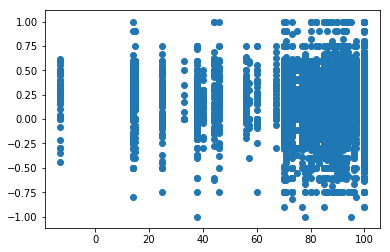

In [11]:
x = npsMty
y = puntajeMty
plt.scatter(x,y)
plt.show()

### Cálculo de cuántos registros hay con NPS positivo y cuántos con NPS negativo para cada campus.

In [12]:
#Distinct campuses
campuses = commentsDf.campus.unique()

In [13]:
promotorsNum = []
detractorsNum = []

for campus in campuses:
    promotors = commentsDf[(commentsDf.campus == campus) & (commentsDf.nps > 0)]
    detractors = commentsDf[(commentsDf.campus == campus) & (commentsDf.nps < 0)]
    numPromotors = promotors['id_programa'].count()
    numDetractors = detractors['id_programa'].count()
    promotorsNum.append(numPromotors)
    detractorsNum.append(numDetractors)

print('Cantidad de NPSs positivos \n' + str(promotorsNum))
print('\n Cantidad de NPSs negativos \n' + str(detractorsNum))


Cantidad de NPSs positivos 
[23226, 9844, 1830, 9098, 594, 1984, 6735, 2218, 306, 1548, 101, 5906, 5977, 9366, 1341, 1207, 1665, 1644, 1144, 964, 29, 511, 1493, 3273, 185, 770, 141, 321, 254, 161, 0, 299, 111, 175, 90, 60, 0]

 Cantidad de NPSs negativos 
[667, 291, 0, 394, 0, 23, 151, 0, 0, 0, 0, 261, 198, 48, 0, 0, 0, 0, 0, 6, 0, 0, 16, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## NPS positivo vs. NPS negativo

In [14]:
promotorsDf = pd.DataFrame()
promotorsDf['campus'] = campuses
promotorsDf['positive_NPS'] = promotorsNum
promotorsDf['negative_NPS'] = detractorsNum
promotorsDf
# CADA PROGRAMA TIENE UN MISMO NPS, por eso se hace por campus 

,campus,positive_NPS,negative_NPS
0,CSF (Santa Fe),23226,667
1,CCM (Ciudad de México),9844,291
2,SAL (Saltillo),1830,0
3,CEM (Estado de México),9098,394
4,TAM (Tampico),594,0
5,TOL (Toluca),1984,23
6,GDL (Guadalajara),6735,151
7,SLP (San Luis Potosí),2218,0
8,HGO (Hidalgo),306,0
9,AGS (Aguascalientes),1548,0


## Tipo de sentimiento

### ¿Qué tipo de sentimiento predomina?

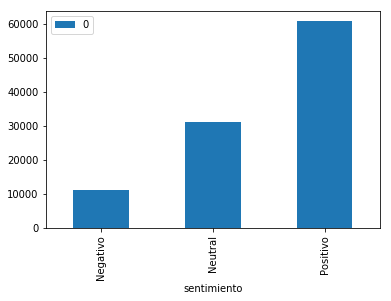

In [15]:
commentsDf.groupby('sentimiento').size().to_frame().plot.bar()

## Análisis de los programas/cursos

### Total de programas/cursos

In [16]:
commentsDf[['id_programa']].drop_duplicates().shape

(1144, 1)

### Programas/cursos con NPS menor a 75

In [17]:
negativeNPS = commentsDf[commentsDf.nps < 75]['id_programa'].drop_duplicates().count()
# TOP 10 "Peores cursos"
commentsDf[commentsDf.nps < 75][['id_programa','programa','nps']].drop_duplicates().sort_values('nps').head(10)

,id_programa,programa,nps
95518,8297,Diplomado en Carrera Corporativa G1,-100.0
84154,7674,Gestión de Proyectos. Preparación para el exam...,-100.0
82339,7606,evaluador prog 2,-100.0
57857,7011,Certificación Internacional en Coaching Ejecut...,-100.0
84698,7706,Programa 3,-100.0
41290,6753,Administración Estratégica de Recursos Humanos,-83.0
61907,7065,Certificación en Six Sigma Green Belt,-75.0
99211,8687,Certificación Internacional en Gestión Ágil de...,-71.0
44518,6800,Desarrollo Organizacional y Gestión del Cambio,-57.0
98429,8664,e-Commerce,-57.0


### ¿Qué instructores imparten esos cursos?

In [18]:
commentsDf[commentsDf.nps < 75][['id_programa','programa','nps','instructor','campus']].drop_duplicates('id_programa').sort_values('nps').head(10)

,id_programa,programa,nps,instructor,campus
95518,8297,Diplomado en Carrera Corporativa G1,-100.0,Carlos Suárez Álvarez,CSF (Santa Fe)
84154,7674,Gestión de Proyectos. Preparación para el exam...,-100.0,Guillermo Haaz Díaz,SIN (Sinaloa)
82339,7606,evaluador prog 2,-100.0,Instructor de Prueba,Campus para realizar pruebas
57857,7011,Certificación Internacional en Coaching Ejecut...,-100.0,Juan Carlos Bonilla Bustamante,TOL (Toluca)
84698,7706,Programa 3,-100.0,Instructor No Disponible,Campus para realizar pruebas
41290,6753,Administración Estratégica de Recursos Humanos,-83.0,Juan Alberto Corona Medina,QRO (Querétaro)
61907,7065,Certificación en Six Sigma Green Belt,-75.0,Froylan Franco Herrera,PUE (Puebla)
99211,8687,Certificación Internacional en Gestión Ágil de...,-71.0,Martín Sierra Mercado,CEM (Estado de México)
44518,6800,Desarrollo Organizacional y Gestión del Cambio,-57.0,Carlos Gustavo Ortiz Vancini,QRO (Querétaro)
98429,8664,e-Commerce,-57.0,Egdar Fabiel Sánchez Díaz,CCM (Ciudad de México)


### Programas/cursos con NPS mayor a 75

In [19]:
positiveNPS = commentsDf[commentsDf.nps > 75]['id_programa'].drop_duplicates().count()
# TOP 10 "Mejores cursos"
commentsDf[commentsDf.nps > 75][['id_programa','programa','nps']].drop_duplicates('id_programa').sort_values('nps', ascending = False).head(10)

,id_programa,programa,nps
90,4400,Liderazgo Tranformacional,100.0
83882,7670,My leadership journey (Tol G8),100.0
85204,7721,Gestión de la Administración de Proyectos,100.0
84942,7716,Administración Financiera,100.0
84708,7710,DIPLOMADO EN EMPRENDIMIENTO Y GESTION DE EVENTOS,100.0
84706,7708,Programa 4,100.0
84702,7707,Programa 2,100.0
84695,7705,Programa 1,100.0
84606,7703,Certificación en Lean Six Sigma Black Belt,100.0
84549,7702,Sistemas Estratégicos de Compensaciones y Bene...,100.0


### ¿Qué instructores imparten esos cursos?

In [20]:
commentsDf[commentsDf.nps > 75][['id_programa','programa','nps','instructor','campus']].drop_duplicates('id_programa').sort_values('nps', ascending = False).head(10)

,id_programa,programa,nps,instructor,campus
90,4400,Liderazgo Tranformacional,100.0,Armando Villa Hernández,CEM (Estado de México)
83882,7670,My leadership journey (Tol G8),100.0,Katia Villafuerte .,CSF (Santa Fe)
85204,7721,Gestión de la Administración de Proyectos,100.0,Juan Gerardo Gutiérrez Bernal,AGS (Aguascalientes)
84942,7716,Administración Financiera,100.0,Fernando Vera Sánchez,PUE (Puebla)
84708,7710,DIPLOMADO EN EMPRENDIMIENTO Y GESTION DE EVENTOS,100.0,Luis Miguel Roman Lira,LEO (León)
84706,7708,Programa 4,100.0,Instructor No Disponible,Campus para realizar pruebas
84702,7707,Programa 2,100.0,Instructor No Disponible,Campus para realizar pruebas
84695,7705,Programa 1,100.0,Einnar Escamilla Moreno,Campus para realizar pruebas
84606,7703,Certificación en Lean Six Sigma Black Belt,100.0,Ma. Del Carmen García Vega,SLP (San Luis Potosí)
84549,7702,Sistemas Estratégicos de Compensaciones y Bene...,100.0,Juan Alberto Corona Medina,QRO (Querétaro)


### Programas/cursos que no tienen información del NPS

In [21]:
nullNPS = commentsDf[commentsDf.nps.isnull()]['id_programa'].drop_duplicates().count()
print(nullNPS)

164


### Cursos vs. NPS

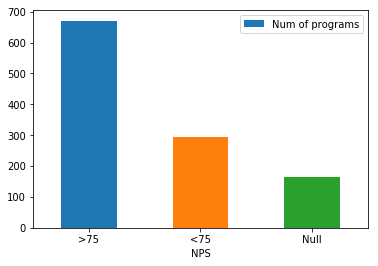

In [22]:
programNPS = pd.DataFrame({'NPS':['>75', '<75', 'Null'], 'Num of programs':[positiveNPS, negativeNPS, nullNPS]})
ax = programNPS.plot.bar(x='NPS', y='Num of programs', rot=0)

### Porcentaje de cursos en cada categoría de NPS

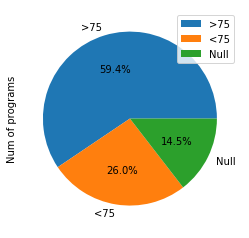

In [23]:
programNPS.plot.pie(y='Num of programs', labels = programNPS.NPS, autopct='%.1f%%')

## Análisis de los campus

### TOP 10 de los campus que tienen mayor cantidad de programas/cursos con NPS < 75

In [24]:

topMinor = commentsDf[commentsDf.nps < 75].drop_duplicates('id_programa').groupby('campus').size().sort_values(ascending = False).to_frame().head(10)
topMinor

,0
campus,
CSF (Santa Fe),63
CCM (Ciudad de México),44
CEM (Estado de México),33
MTY (Monterrey),24
QRO (Querétaro),22
PUE (Puebla),21
GDL (Guadalajara),19
ECU(Ecuador),10
SLP (San Luis Potosí),7


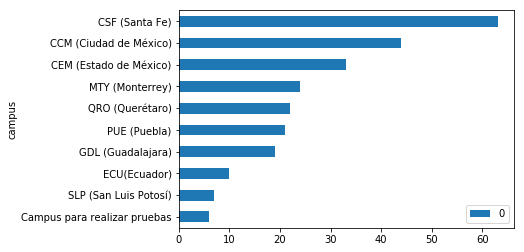

In [25]:
topMinor.sort_values(0,ascending = True).plot.barh()

## Análisis por fecha

### Se agrega la columna de año (separándolo de la fecha completa)

In [26]:
#commentsDf = commentsDf.rename(columns={"fehca_inicio_modulo": "fecha_inicio_modulo"})
commentsDf['start_year'] = pd.DatetimeIndex(commentsDf['fecha_inicio_modulo']).year
commentsDf.head()


,id,tipo,campus,id_programa,nps,programa,id_externo_programa,id_modulo,modulo,instructor,...,fecha_fin_modulo,indicador,codigo_indicador,comentario,puntaje_sentimiento,sentimiento,categoria,subcategoria,grupo,start_year
0,1,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-06-01,Retroalimentación para el Instructor,CAINST,"Que su curso lo haga mas dinámico, tiene una v...",-0.12,Negativo,Instructor,Dinamismo y Ejercicios,4,2018
1,2,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-06-01,Retroalimentación para el Instructor,CAINST,"El instructuor es muy bueno, conoce muy bien l...",0.46,Positivo,Instructor,Habilidad de Enseñanza,4,2018
2,3,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-06-01,Retroalimentación para el Instructor,CAINST,Todo estuvo bien. Me gustarían ejercicios prác...,0.10,Neutral,Instructor,Dinamismo y Ejercicios,4,2018
3,4,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-06-01,Retroalimentación para el Instructor,CAINST,"La clase estuvo excelente, pero sería major si...",0.30,Positivo,Programa,Diseño y Estructura (Coherencia),4,2018
4,5,B2B,CSF (Santa Fe),3483,-50.0,Consultoría de Negocio,csf_c_0901B11353_2,60328,M16 G1: Mercados Financieros Nacionales e Inte...,Gerardo Salazar Viezca,...,2018-06-01,Retroalimentación para el Instructor,CAINST,Actividades más dinámicas durante el curso,0.22,Positivo,Instructor,Dinamismo y Ejercicios,4,2018


### NPS a través de los años

In [27]:
meansByYear = commentsDf.groupby('start_year').mean()
meansByYear

,id,id_programa,nps,id_modulo,puntaje_sentimiento,grupo
start_year,,,,,,
2017,7984.283293,5250.883777,74.994382,84239.399516,0.177869,3.832930
2018,48018.326879,6693.055728,77.921259,104580.648932,0.174729,3.484241
2019,91587.186684,8261.802035,81.690535,127520.113470,0.197449,3.455983


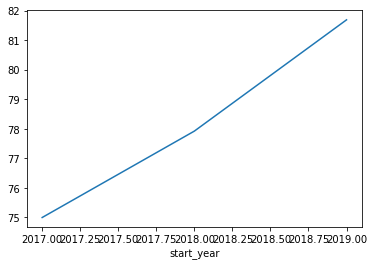

In [28]:
meansByYear['nps'].plot.line()

### Si mostramos el año de los cursos peor evaluados  vemos que todos pertenecen al 2018

In [29]:
commentsDf[commentsDf.nps < 75][['id_programa','programa','nps','instructor','start_year']].drop_duplicates('id_programa').sort_values('nps').head(10)

,id_programa,programa,nps,instructor,start_year
95518,8297,Diplomado en Carrera Corporativa G1,-100.0,Carlos Suárez Álvarez,2018
84154,7674,Gestión de Proyectos. Preparación para el exam...,-100.0,Guillermo Haaz Díaz,2018
82339,7606,evaluador prog 2,-100.0,Instructor de Prueba,2018
57857,7011,Certificación Internacional en Coaching Ejecut...,-100.0,Juan Carlos Bonilla Bustamante,2018
84698,7706,Programa 3,-100.0,Instructor No Disponible,2018
41290,6753,Administración Estratégica de Recursos Humanos,-83.0,Juan Alberto Corona Medina,2018
61907,7065,Certificación en Six Sigma Green Belt,-75.0,Froylan Franco Herrera,2018
99211,8687,Certificación Internacional en Gestión Ágil de...,-71.0,Martín Sierra Mercado,2018
44518,6800,Desarrollo Organizacional y Gestión del Cambio,-57.0,Carlos Gustavo Ortiz Vancini,2018
98429,8664,e-Commerce,-57.0,Egdar Fabiel Sánchez Díaz,2018


## Análisis Grupo 1

### En este grupo se contemplan los campus: 
 * Aguascalientes
 * Chihuahua
 * Laguna
 * Mérida
 * Saltillo
 * Toluca
 * Zacatecas

In [30]:
group1Df = commentsDf[commentsDf.grupo == 1] 
group1Df.head()

,id,tipo,campus,id_programa,nps,programa,id_externo_programa,id_modulo,modulo,instructor,...,fecha_fin_modulo,indicador,codigo_indicador,comentario,puntaje_sentimiento,sentimiento,categoria,subcategoria,grupo,start_year
37,38,B2B,SAL (Saltillo),4143,NaN,Certificación Asesores Comerciales de Vitromex...,sal_c__31,68970,M12 G4: Bloque 5 - Plan de venta de operación,Instructor No Disponible,...,2019-03-15,Retroalimentación para el Instructor,CAINST,modulo muy compoleto,0.0,Neutral,Programa,Cumplimiento Temario y Expectativas,1,2019
38,39,B2B,SAL (Saltillo),4143,NaN,Certificación Asesores Comerciales de Vitromex...,sal_c__31,68970,M12 G4: Bloque 5 - Plan de venta de operación,Instructor No Disponible,...,2019-03-15,Retroalimentación de servicios generales,CAGRAL,"solo que preguntaras acerca de los alimentos ,...",0.2,Positivo,Tangibles,Alimentos,1,2019
39,40,B2B,SAL (Saltillo),4143,NaN,Certificación Asesores Comerciales de Vitromex...,sal_c__31,68971,M13 G4: Bloque 5 - Comunicación/asegurar el me...,Instructor No Disponible,...,2019-03-15,Retroalimentación para el Instructor,CAINST,NINGUNA,0.0,Neutral,Sin Categoria,Mejorar Diccionario,1,2019
40,41,B2B,SAL (Saltillo),4143,NaN,Certificación Asesores Comerciales de Vitromex...,sal_c__31,68971,M13 G4: Bloque 5 - Comunicación/asegurar el me...,Instructor No Disponible,...,2019-03-15,Retroalimentación de servicios generales,CAGRAL,NINGUNA,0.0,Neutral,Sin Categoria,Mejorar Diccionario,1,2019
41,42,B2B,SAL (Saltillo),4143,NaN,Certificación Asesores Comerciales de Vitromex...,sal_c__31,68974,M16 G4: Bloque 5 - De mantra/pronostico ventas,Instructor No Disponible,...,2019-03-15,Retroalimentación para el Instructor,CAINST,No se ha realizado el curso,0.0,Neutral,Sin Categoria,Mejorar Diccionario,1,2019


### Distribución del NPS

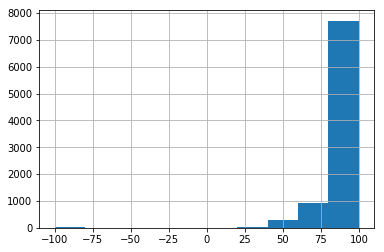

In [31]:
group1Df.nps.hist()

### Distribución del puntaje de sentimiento

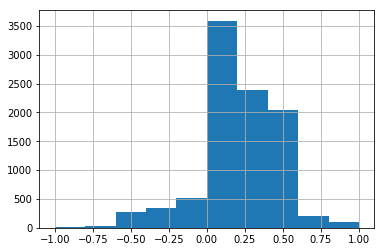

In [32]:
group1Df.puntaje_sentimiento.hist()

### Scatter plot NPS vs. puntaje de sentimiento

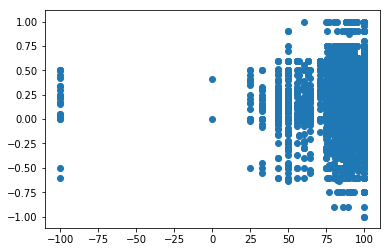

In [33]:
plt.scatter(group1Df['nps'],group1Df['puntaje_sentimiento'])
plt.show()

### Tipo de sentimiento que predomina

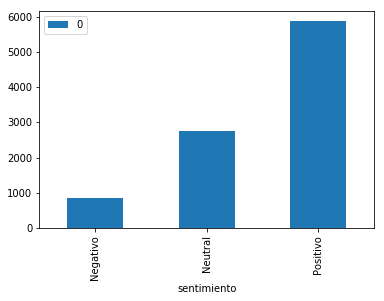

In [34]:
group1Df.groupby('sentimiento').size().to_frame().plot.bar()

### Total de cursos únicos en el grupo 1

In [36]:
group1Df[['id_programa']].drop_duplicates().shape

(132, 1)

### Cursos con NPS < 75

#### TOP PEORES CURSOS EN EL GRUPO 1

In [55]:
g1NegativeNPS = group1Df[group1Df.nps < 75]['id_programa'].drop_duplicates().count()
print("Número de cursos con NPS negativo: " + str(g1NegativeNPS))
group1Df[group1Df.nps < 75][['id_programa','programa','nps','instructor','start_year']].drop_duplicates('id_programa').sort_values('nps')

Número de cursos con NPS negativo: 15


,id_programa,programa,nps,instructor,start_year
57857,7011,Certificación Internacional en Coaching Ejecut...,-100.0,Juan Carlos Bonilla Bustamante,2018
93068,8125,TALLER DE PLANEACIÓN ESTRATÉGICA,0.0,Pedro Manuel Facio Lícera,2018
15667,5531,Certificación en Lean Six Sigma Black Belt,25.0,José Martín Burgos González Pacheco,2017
8326,5402,Lean Manufacturing,33.0,Marco Antonio Sierra Vázquez,2018
98107,8636,Logística y Administración de la Cadena de Sum...,33.0,José Jacobo Eluani Vazquez,2018
8415,5417,"Desarrollo de Habilidades en Contabilidad, Imp...",43.0,Instructor No Disponible,2018
102493,9274,FINANZAS PARA NO FINANCIEROS,43.0,GUILLERMO ERNESTO Garza De la Fuente,2019
50275,6890,Gestión de Proyectos. Preparación para el exam...,50.0,José Victor García Castellanos,2018
96033,8373,Administración de Inventarios,50.0,Pedro Damián Cobos Chávez,2018
91973,8030,Gestión de la Administración de Proyectos,56.0,Carlos Arnoldo Chee González,2018


### Cursos con NPS > 75

#### TOP MEJORES CURSOS EN EL GRUPO 1

In [56]:
g1PositiveNPS = group1Df[group1Df.nps > 75]['id_programa'].drop_duplicates().count()
print("Número de cursos con NPS positivo: " + str(g1PositiveNPS))
group1Df[group1Df.nps > 75][['id_programa','programa','nps','instructor','start_year']].drop_duplicates('id_programa').sort_values('nps', ascending=False).head(15)

Número de cursos con NPS positivo: 93


,id_programa,programa,nps,instructor,start_year
85859,7738,Finanzas para no Financieros,100.0,Pedro Antonio Martínez Acosta,2018
93347,8137,IMSS - Taller: Desarrollo de supervisores que ...,100.0,José Luis Sosa Rodríguez,2018
81374,7535,Business Management,100.0,Eduardo Franco Padilla,2018
81449,7678,Gestión de Proyectos. Preparación para el exam...,100.0,Yebel Jesús Piñón Áviles,2018
82702,7614,COPARMEX - Seminario de Actualización Empresarial,100.0,Juan José Arnedo Kidd,2018
85204,7721,Gestión de la Administración de Proyectos,100.0,Juan Gerardo Gutiérrez Bernal,2018
8477,5421,Diplomado Liderazgo para Gerentes (Volaris 1),100.0,Bertha Castro Ruiz,2018
85884,7739,Habilidades Gerenciales,100.0,MAXIMINA VAQUERA PEDROZA,2018
89021,7827,Desarrollo de Habilidades Gerenciales: Líder d...,100.0,Luis Eduardo Rodríguez León,2018
89852,7847,Finanzas para no Financieros,100.0,FRANCISCO ANTONIO SERRANO CAMARENA,2018


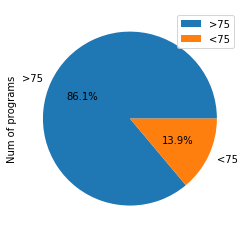

In [58]:
programNPS.plot.pie(y='Num of programs', labels = programNPS.NPS, autopct='%.1f%%')